In [1]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np
from helper import *

Using TensorFlow backend.


In [2]:
dir_path = "../data/"
seed = 1
BATCH_SIZE = 2

In [3]:
# mask values: 0 or 255
x = load_image_from_folder(dir_path + "sample_image/image")
y = load_image_from_folder(dir_path + "sample_mask/mask")

### turn mask into non-RGB, binary
y = y.mean(axis=3)/255

### reshape to tensor
x = x.reshape((-1,224,224,3))
y = y.reshape((-1,224,224,1))

In [4]:
# we create two instances with the same arguments
data_gen_args = dict(rescale=1./255,
                     rotation_range=30,
                     width_shift_range=0.2,
                     height_shift_range=0.2,
                     shear_range = 0.05,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')
image_datagen = image.ImageDataGenerator(**data_gen_args)
mask_datagen = image.ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(x, augment=True, seed=seed)
#mask_datagen.fit(y, augment=True, seed=seed)

''' model.fit_generator
image_generator = image_datagen.flow_from_directory(
    '../data/sample_image',
    save_to_dir = '../data/sample_image/sample_image_aug',
    target_size = (224,224),
    batch_size = 1,
    class_mode=None,
    seed=seed)

mask_generator = mask_datagen.flow_from_directory(
    '../data/sample_mask',
    save_to_dir = '../data/sample_mask/sample_mask_aug',
    target_size = (224,224),
    batch_size = 1,
    class_mode=None,
    seed=seed)

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

'''


" model.fit_generator\nimage_generator = image_datagen.flow_from_directory(\n    '../data/sample_image',\n    save_to_dir = '../data/sample_image/sample_image_aug',\n    target_size = (224,224),\n    batch_size = 1,\n    class_mode=None,\n    seed=seed)\n\nmask_generator = mask_datagen.flow_from_directory(\n    '../data/sample_mask',\n    save_to_dir = '../data/sample_mask/sample_mask_aug',\n    target_size = (224,224),\n    batch_size = 1,\n    class_mode=None,\n    seed=seed)\n\n# combine generators into one which yields image and masks\ntrain_generator = zip(image_generator, mask_generator)\n\n"

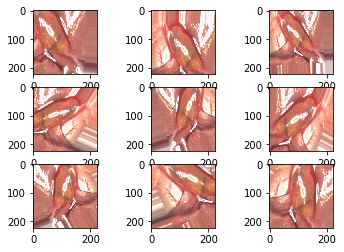

In [7]:
### shuffle = True
### it's OK to shuffle, the image - mask will still be paired

n = 0
for i in image_datagen.flow(x, batch_size = BATCH_SIZE, seed = seed):
    if n >= 9:
        plt.savefig('../data/sample_image/sample_image_aug.jpg')
        break
    plt.subplot(330 + 1 + n)
    plt.imshow(i[0,:,:,:])
    n += 1  

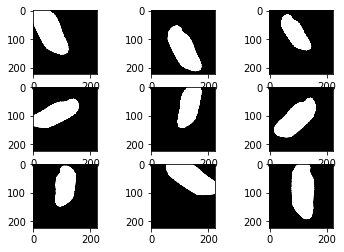

In [8]:
n = 0
for i in mask_datagen.flow(y, batch_size = BATCH_SIZE, seed = seed):
    if n >= 9:
        plt.savefig('../data/sample_mask/sample_mask_aug.jpg')
        break
    plt.subplot(330 + 1 + n)
    plt.imshow(i[0,:,:,0], cmap = 'gray')
    n += 1  